In [1]:
import pandas as pd
from pandas import Series, DataFrame
import json 
import os
import requests 
import math
import sqlite3
import copy
import re
import seaborn as sns
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
matplotlib.rcParams.update({'font.size': 15})


In [2]:
#code references for the new data
coderef = pd.read_csv("newbudget1codereferences.csv")
#services provided per planning
planningservice = coderef[coderef["Agency"]== "65 -  PLANNING"].copy()
planningservice

,Organization,Agency,Service,Subservice,Location
513,65101 - PL NEIGH PLAN PRES DESIGN ADMI,65 - PLANNING,651 - NEIGH PLANNING PRES AND DESIGN,6501 - ADMINISTRATION,0000 - UNDEFINED
514,65110 - PL NEIGHBORHOOD PLANNING,65 - PLANNING,651 - NEIGH PLANNING PRES AND DESIGN,6510 - NEIGHBORHOOD PLANNING,0000 - UNDEFINED
515,65111 - PL PRESERVATION PLANNING,65 - PLANNING,651 - NEIGH PLANNING PRES AND DESIGN,6511 - PRESERVATION PLANNING,0000 - UNDEFINED
516,65112 - PL MADISON ARTS PROGRAM,65 - PLANNING,651 - NEIGH PLANNING PRES AND DESIGN,6512 - MADISON ARTS PROGRAM,0000 - UNDEFINED
517,65113 - PL URBAN DESIGN COMMISSION,65 - PLANNING,651 - NEIGH PLANNING PRES AND DESIGN,6513 - URBAN DESIGN COMMISSION,0000 - UNDEFINED
518,65114 - PL SPECIAL PROJECTS,65 - PLANNING,651 - NEIGH PLANNING PRES AND DESIGN,6514 - SPECIAL PROJECTS,0000 - UNDEFINED
519,65115 - PL TIF CDA REDEVELOPMENT PLAN,65 - PLANNING,651 - NEIGH PLANNING PRES AND DESIGN,6515 - TIF CDA REDEVELOPMENT PLANNING,0000 - UNDEFINED
520,65201 - PL COMP PLAN AND DEVELOP ADMIN,65 - PLANNING,652 - COMP PLANNING AND DEV REVIEW,6501 - ADMINISTRATION,0000 - UNDEFINED
521,65220 - PL PLAN COMMISSION DEV REVIEW,65 - PLANNING,652 - COMP PLANNING AND DEV REVIEW,6520 - PLAN COMMISSION DEV REVIEW,0000 - UNDEFINED
522,65221 - PL DEVELP LAND USE ZONING REG,65 - PLANNING,652 - COMP PLANNING AND DEV REVIEW,6521 - DEVELP LAND USE AND ZONING REG,0000 - UNDEFINED


In [3]:
#origional data 
madisonfinancedf = pd.read_csv("budget.csv")
madisonfinancedf

,Agency,Organization,Account Type,Character Code,Object,2015,2016,2017,2018
0,50 - LIBRARY,50100 - LIB PUBLIC SERVICE,Revenue,41 - GENERAL REVENUES,41110 - REAL ESTATE TAXES,-11355535.00,-11941627.00,-12603779.00,-13080447.90
1,50 - LIBRARY,50300 - LIB COL RES & ACCESS,Revenue,41 - GENERAL REVENUES,41110 - REAL ESTATE TAXES,-2056164.00,-2222626.00,-2199357.00,-2268968.77
2,50 - LIBRARY,50400 - LIB FACILITIES,Revenue,41 - GENERAL REVENUES,41110 - REAL ESTATE TAXES,-1766869.00,-1768986.00,-1963404.00,-1976738.18
3,51 - PARKS,51220 - PARK MTC FORESTRY GENERAL,Revenue,49 - TRANSFER IN,49124 - TRANSFER IN FROM OTHER RESTRIC,-1000000.00,-2500000.00,-3100342.25,0.00
4,44 - STREETS,44220 - ST RECYCLING COLLECTION,Revenue,43 - CHARGES FOR SERVICES,43445 - SALE OF RECYCLABLES,-841012.69,-866760.77,-1218608.41,-892803.25
5,65 - PLANNING,65300 - PL METROPOLITAN PLANNING ORG,Revenue,49 - TRANSFER IN,49123 - TRANSFER IN FROM GRANTS,-683795.41,-809850.95,0.00,0.00
6,20 - MUNICIPAL COURT,20100 - MUNICIPAL COURT,Revenue,43 - CHARGES FOR SERVICES,43120 - COURT FEES,-640286.53,-624340.58,-515025.37,-421899.96
7,30 - FIRE,30252 - FIRE INSPECTION ELEVATOR,Revenue,44 - LICENSES AND PERMITS,44230 - ELEVATOR PERMITS AND INSPECTS,-617670.00,-606446.50,-534775.00,-555936.50
8,40 - ENGINEERING,40470 - ENG FAC MAINT ADMIN,Expense,58 - INTER DEPART BILLING,58131 - ID BILLING TO POLICE,-531289.00,-533701.00,-536303.00,-611303.00
9,50 - LIBRARY,50300751 - LIB COL RES & ACCESS CENTRAL,Revenue,43 - CHARGES FOR SERVICES,43568 - CATALOGING SERVICES,-455858.00,-454255.00,-454255.00,-454290.00


In [4]:
#copy of origional data
mfdf = madisonfinancedf.copy()
mfdf = pd.DataFrame(mfdf)
mfdf = mfdf.sort_values('Agency')
mfdf


,Agency,Organization,Account Type,Character Code,Object,2015,2016,2017,2018
8326,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,58 - INTER DEPART BILLING,58180 - ID BILLING TO MONONA TERRACE,NaN,NaN,NaN,0.00
1761,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,52 - BENEFITS,52715 - GRANT,0.00,780.68,0.00,0.00
8332,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,58 - INTER DEPART BILLING,58186 - ID BILLING TO WATER,NaN,NaN,NaN,0.00
6928,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,54 - PURCHASED SERVICES,54645 - CONSULTING SERVICES,68531.03,75298.12,72167.32,83768.30
8331,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,58 - INTER DEPART BILLING,58185 - ID BILLING TO TRANSIT,NaN,NaN,NaN,0.00
8330,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,58 - INTER DEPART BILLING,58184 - ID BILLING TO STORMWATER,NaN,NaN,NaN,0.00
6883,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,54 - PURCHASED SERVICES,54628 - COLLECTION SERVICES,60000.00,40000.00,60000.00,60000.00
8329,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,58 - INTER DEPART BILLING,58183 - ID BILLING TO SEWER,NaN,NaN,NaN,0.00
6866,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,52 - BENEFITS,52412 - LIFE INSURANCE BENEFIT,55866.18,45616.73,42317.13,41289.30
8328,00 - UNDEFINED,110020 - GENERAL FUND EXPENSE,Expense,58 - INTER DEPART BILLING,58182 - ID BILLING TO PARKING,NaN,NaN,NaN,0.00


In [5]:
#Cleaning up the data
mfdf["Agency"] = mfdf["Agency"].str.replace('[^A-Za-z\s]+', '').str.strip()
mfdf["Organization"]= mfdf["Organization"].str.replace('[^A-Za-z\s]+', '').str.strip()
mfdf["Character Code"]= mfdf["Character Code"].str.replace('[^A-Za-z\s]+', '').str.strip()
mfdf["Object"]=mfdf["Object"].str.replace('[^A-Za-z\s]+', '').str.strip()
mfdf

,Agency,Organization,Account Type,Character Code,Object,2015,2016,2017,2018
8326,UNDEFINED,GENERAL FUND EXPENSE,Expense,INTER DEPART BILLING,ID BILLING TO MONONA TERRACE,NaN,NaN,NaN,0.00
1761,UNDEFINED,GENERAL FUND EXPENSE,Expense,BENEFITS,GRANT,0.00,780.68,0.00,0.00
8332,UNDEFINED,GENERAL FUND EXPENSE,Expense,INTER DEPART BILLING,ID BILLING TO WATER,NaN,NaN,NaN,0.00
6928,UNDEFINED,GENERAL FUND EXPENSE,Expense,PURCHASED SERVICES,CONSULTING SERVICES,68531.03,75298.12,72167.32,83768.30
8331,UNDEFINED,GENERAL FUND EXPENSE,Expense,INTER DEPART BILLING,ID BILLING TO TRANSIT,NaN,NaN,NaN,0.00
8330,UNDEFINED,GENERAL FUND EXPENSE,Expense,INTER DEPART BILLING,ID BILLING TO STORMWATER,NaN,NaN,NaN,0.00
6883,UNDEFINED,GENERAL FUND EXPENSE,Expense,PURCHASED SERVICES,COLLECTION SERVICES,60000.00,40000.00,60000.00,60000.00
8329,UNDEFINED,GENERAL FUND EXPENSE,Expense,INTER DEPART BILLING,ID BILLING TO SEWER,NaN,NaN,NaN,0.00
6866,UNDEFINED,GENERAL FUND EXPENSE,Expense,BENEFITS,LIFE INSURANCE BENEFIT,55866.18,45616.73,42317.13,41289.30
8328,UNDEFINED,GENERAL FUND EXPENSE,Expense,INTER DEPART BILLING,ID BILLING TO PARKING,NaN,NaN,NaN,0.00


In [6]:
#data frame for planning yearly budget by charactercodes 
agency = mfdf[mfdf['Agency']=="PLANNING"]
agency1 = mfdf[mfdf['Agency']=="COMMUNITY DEVELOPMENT"]
agencydic= {"2015": {}, "2016": {} , "2017": {} , "2018": {} }
for year in agencydic:
    for code in agency["Organization"]:
        if code not in agencydic[year]:
            a = agency[agency["Organization"]==code]
            summ = a[year].sum()
            agencydic[year][code] = copy.deepcopy(summ)
adf = pd.DataFrame(agencydic["2015"], index=["2015"])
bdf = pd.DataFrame(agencydic["2016"], index=["2016"])
cdf = pd.DataFrame(agencydic["2017"], index=["2017"])
ddf = pd.DataFrame(agencydic["2018"], index=["2018"])
planyearorg = pd.concat([adf, bdf, cdf, ddf])
planyearorg=planyearorg/1000000

planyearorg


,PL METROPOLITAN PLANNING ORG,PL NEIGH PLAN PRES DESIGN ADMI,PL COMP NEIGH SPEC AREA PLAN,PL NEIGHBORHOOD PLANNING,PL TRANSPORTATION PLAN NON MPO,PL COMP PLAN AND DEVELOP ADMIN,PL PRESERVATION PLANNING,PL SPECIAL PROJECTS,PL RESEARCH INFORMATION SERVIC,PL PLAN COMMISSION DEV REVIEW,PL GEO GIS ADMINISTRATION MAIN,PL URBAN DESIGN COMMISSION,PL MADISON ARTS PROGRAM,PL TIF CDA REDEVELOPMENT PLAN,PL DEVELP LAND USE ZONING REG,PL LAND USE POLICY INTERGOV PL
2015,0.283503,0.297465,0.219246,0.252465,0.134689,0.340130,0.109043,0.212096,0.225441,0.296121,0.106075,0.111734,1.942465,0.000000,0.0,0.0
2016,0.258890,0.335264,0.365725,0.281964,0.203631,0.418839,0.108182,0.301593,0.191919,0.236606,0.048955,0.110497,0.182965,0.000000,0.0,0.0
2017,0.140959,0.377865,0.480060,0.360768,0.221787,0.603246,0.117936,0.100695,0.162118,0.196876,0.087631,0.005203,0.218855,0.000025,0.0,0.0
2018,0.094496,0.421926,0.420081,0.377337,0.365577,0.568047,0.078490,0.127823,0.109070,0.298799,0.102560,0.000000,0.202924,0.000000,0.0,0.0


In [7]:
a=planyearorg.transpose()
a.reset_index(level=0, inplace=True)
a["index"]

0       PL METROPOLITAN PLANNING ORG
1     PL NEIGH PLAN PRES DESIGN ADMI
2       PL COMP NEIGH SPEC AREA PLAN
3           PL NEIGHBORHOOD PLANNING
4     PL TRANSPORTATION PLAN NON MPO
5     PL COMP PLAN AND DEVELOP ADMIN
6           PL PRESERVATION PLANNING
7                PL SPECIAL PROJECTS
8     PL RESEARCH INFORMATION SERVIC
9      PL PLAN COMMISSION DEV REVIEW
10    PL GEO GIS ADMINISTRATION MAIN
11        PL URBAN DESIGN COMMISSION
12           PL MADISON ARTS PROGRAM
13     PL TIF CDA REDEVELOPMENT PLAN
14     PL DEVELP LAND USE ZONING REG
15    PL LAND USE POLICY INTERGOV PL
Name: index, dtype: object

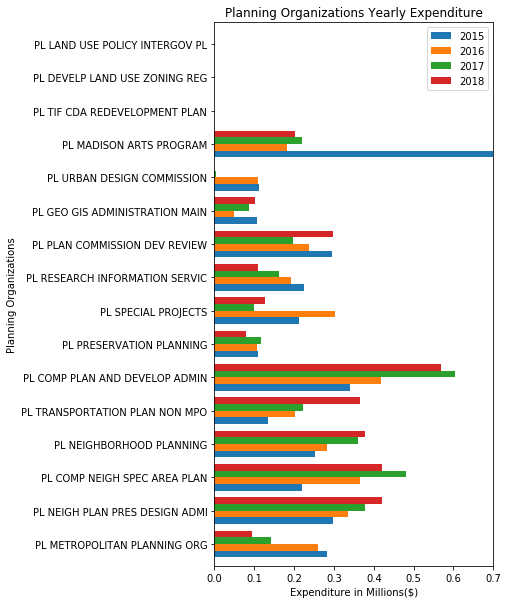

In [8]:
#planning organizations by yearly expenditure horizontal bar 
data=planyearorg.T.plot.barh(figsize=(5,10),title="Planning Organizations Yearly Expenditure", width=0.8) 
data.set_ylabel("Planning Organizations")
data.set_xlabel("Expenditure in Millions($)")
data.set_xlim(0,0.7)
data.legend(loc='upper right')

AxesSubplot(0.125,0.125;0.775x0.755)


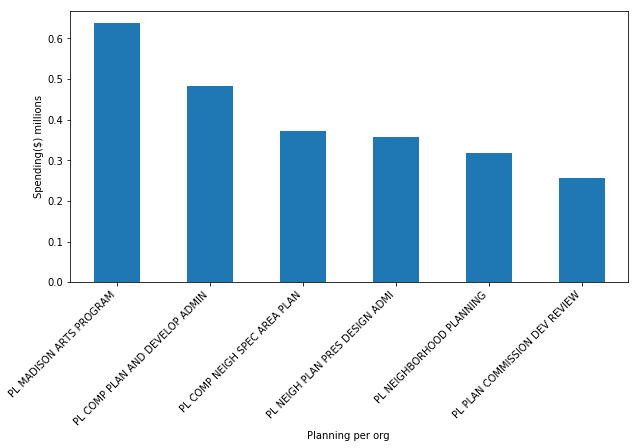

In [9]:
#MEAN bar plot for planning yearly budget by Organization top 5
plot3 = planyearorg.mean().sort_values(ascending=False).head(6).T.plot.bar(figsize=(10,5))
plot3.set_ylabel("Spending($) millions")
plot3.set_xlabel("Planning per org ")
plot3.set_xticklabels(plot3.get_xticklabels(), rotation=45, ha="right")
print(plot3)

[Text(0, 0, 'PL COMP PLAN AND DEVELOP ADMIN'),
 Text(0, 0, 'PL COMP NEIGH SPEC AREA PLAN'),
 Text(0, 0, 'PL NEIGH PLAN PRES DESIGN ADMI'),
 Text(0, 0, 'PL NEIGHBORHOOD PLANNING'),
 Text(0, 0, 'PL PLAN COMMISSION DEV REVIEW'),
 Text(0, 0, 'PL TRANSPORTATION PLAN NON MPO'),
 Text(0, 0, 'PL METROPOLITAN PLANNING ORG'),
 Text(0, 0, 'PL SPECIAL PROJECTS'),
 Text(0, 0, 'PL RESEARCH INFORMATION SERVIC'),
 Text(0, 0, 'PL PRESERVATION PLANNING'),
 Text(0, 0, 'PL GEO GIS ADMINISTRATION MAIN'),
 Text(0, 0, 'PL URBAN DESIGN COMMISSION'),
 Text(0, 0, 'PL TIF CDA REDEVELOPMENT PLAN'),
 Text(0, 0, 'PL LAND USE POLICY INTERGOV PL'),
 Text(0, 0, 'PL DEVELP LAND USE ZONING REG')]

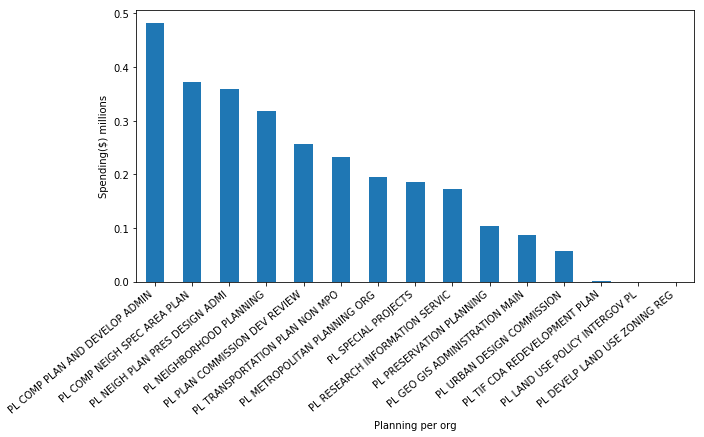

In [10]:
#changes in the top 5 spending excluding art
noart=planyearorg.drop(['PL MADISON ARTS PROGRAM'], axis=1)
plot9 = noart.mean().sort_values(ascending=False).T.plot.bar(figsize=(10,5),rot=0) 
plot9.set_ylabel("Spending($) millions")
plot9.set_xlabel("Planning per org")
plot9.set_xticklabels(plot9.get_xticklabels(), rotation=40, ha="right")


,Change Rate
PL TRANSPORTATION PLAN NON MPO,171.422272
PL COMP NEIGH SPEC AREA PLAN,91.602733
PL COMP PLAN AND DEVELOP ADMIN,67.008759
PL NEIGHBORHOOD PLANNING,49.461057
PL NEIGH PLAN PRES DESIGN ADMI,41.840854
PL PLAN COMMISSION DEV REVIEW,0.904255
PL GEO GIS ADMINISTRATION MAIN,-3.313363
PL PRESERVATION PLANNING,-28.019417
PL SPECIAL PROJECTS,-39.733414
PL RESEARCH INFORMATION SERVIC,-51.619398


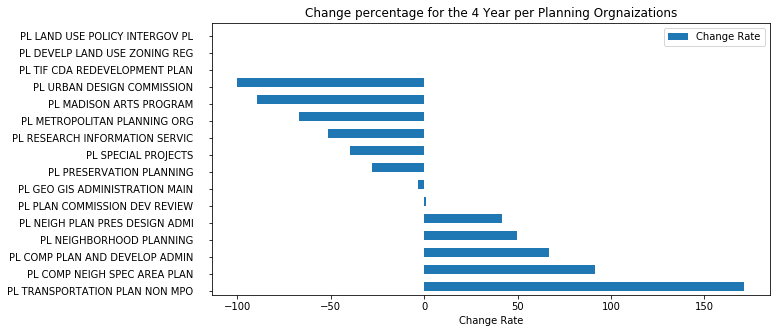

In [11]:
#changes rates for org
change=pd.DataFrame((planyearorg.transpose()["2018"]-planyearorg.transpose()["2015"])/planyearorg.transpose()["2015"]*100)
change.rename(columns={0:'Change Rate'}, inplace=True)
change=change.sort_values("Change Rate",ascending=False)
changeplot=change.transpose().T.plot.barh(figsize=(10,5),rot=0, align='edge', width=0.5, title="Change percentage for the 4 Year per Planning Orgnaizations") 

changeplot.legend(loc='upper right')
changeplot.tick_params(axis='y', which='major', pad=15)

changeplot.set_xlabel("Change Rate")
change

,2015,2016,2017,2018
PL TRANSPORTATION PLAN NON MPO,0.134689,0.203631,0.221787,0.365577
PL COMP NEIGH SPEC AREA PLAN,0.219246,0.365725,0.480060,0.420081
PL COMP PLAN AND DEVELOP ADMIN,0.340130,0.418839,0.603246,0.568047
PL NEIGHBORHOOD PLANNING,0.252465,0.281964,0.360768,0.377337
PL NEIGH PLAN PRES DESIGN ADMI,0.297465,0.335264,0.377865,0.421926


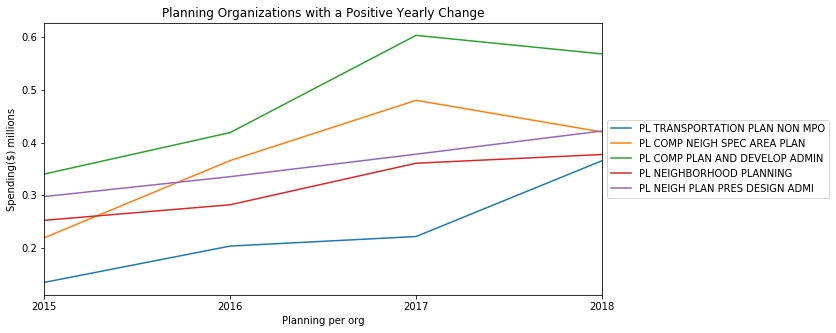

In [12]:
#change rate for only the positive change rate
c=change.transpose()
c=c.fillna(0)
a={}
for org in c:
    if 0<int(c[org]): 
        a[org] = (planyearorg[org])
a=pd.DataFrame(a)
a=a.transpose()
ab = a.T.plot(figsize=(10,5),rot=0,title="Planning Organizations with a Positive Yearly Change") 
ab.set_ylabel("Spending($) millions")
ab.set_xlabel("Planning per org")
ab.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(np.arange(4), a)
a

Text(0.8, 0.55, '1.846316')

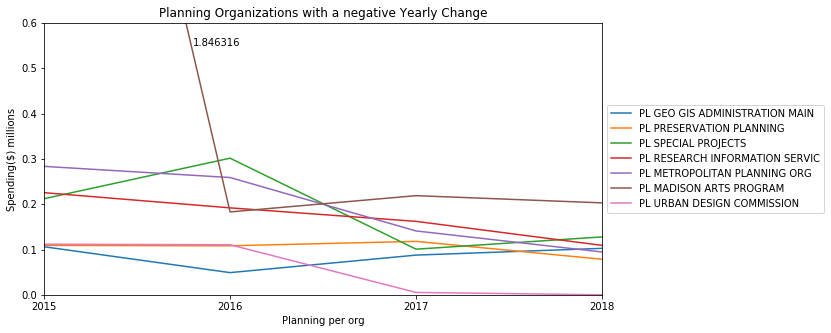

In [13]:
#change rate for only the negative change rate
c=change.transpose()
c=c.fillna(0)
a={}
for org in c:
    if 0>int(c[org]): 
        a[org] = (planyearorg[org])
a=pd.DataFrame(a)
a=a.transpose()
fig, ax = subplots()
ab = a.T.plot(figsize=(10,5),rot=0,ylim=(0,0.6), title="Planning Organizations with a negative Yearly Change",ax=ax) 
ab.set_ylabel("Spending($) millions")
ab.set_xlabel("Planning per org")
ab.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(np.arange(4), a)
ax.annotate('1.846316',(0.8, 0.55))

In [14]:
art=agency[agency["Organization"] =="PL MADISON ARTS PROGRAM"]
agency

,Agency,Organization,Account Type,Character Code,Object,2015,2016,2017,2018
3645,PLANNING,PL METROPOLITAN PLANNING ORG,Expense,SUPPLIES,COPY PRINTING SUPPLIES,438.50,762.81,0.00,0.00
4139,PLANNING,PL NEIGH PLAN PRES DESIGN ADMI,Expense,PURCHASED SERVICES,TELEPHONE,798.31,921.24,1115.37,0.00
1093,PLANNING,PL COMP NEIGH SPEC AREA PLAN,Expense,SALARIES,COMPENSATED ABSENCE,0.00,0.00,1034.81,651.46
7134,PLANNING,PL COMP NEIGH SPEC AREA PLAN,Expense,SALARIES,PERMANENT WAGES,148417.65,217519.52,290009.94,254484.07
1078,PLANNING,PL COMP NEIGH SPEC AREA PLAN,Expense,PURCHASED SERVICES,OTHER SERVICES AND EXPENSES,0.00,0.00,870.60,0.00
4063,PLANNING,PL NEIGHBORHOOD PLANNING,Expense,PURCHASED SERVICES,MEMBERSHIPS,730.00,370.05,810.00,599.00
4027,PLANNING,PL NEIGH PLAN PRES DESIGN ADMI,Expense,BENEFITS,WAGE INSURANCE BENEFIT,704.14,747.50,1007.11,1298.41
3668,PLANNING,PL TRANSPORTATION PLAN NON MPO,Expense,PURCHASED SERVICES,MEMBERSHIPS,460.00,1805.00,1735.00,743.00
1442,PLANNING,PL COMP NEIGH SPEC AREA PLAN,Expense,PURCHASED SERVICES,FACILITY RENTAL,0.00,75.00,75.00,64.74
7316,PLANNING,PL METROPOLITAN PLANNING ORG,Expense,SALARIES,PERMANENT WAGES,550387.31,615377.56,451.65,0.00


AxesSubplot(0.125,0.125;0.775x0.755)


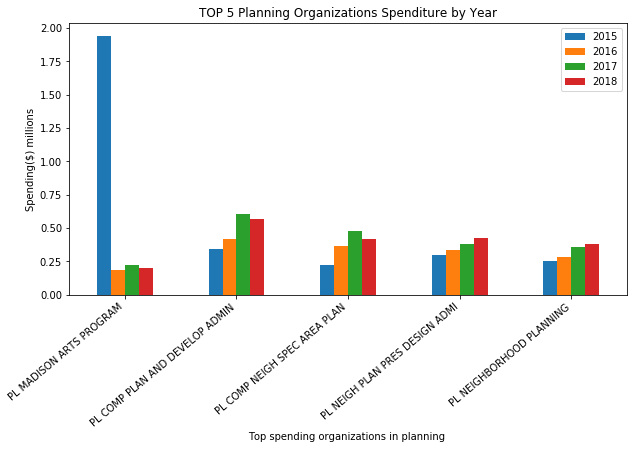

In [15]:
#yearly spending graph of the top five spenditure organization in planning
art=agency[agency["Organization"] =="PL MADISON ARTS PROGRAM"]
b=agency[agency["Organization"] =="PL COMP PLAN AND DEVELOP ADMIN"]
c=agency[agency["Organization"] =="PL COMP NEIGH SPEC AREA PLAN"]
d=agency[agency["Organization"] =="PL NEIGH PLAN PRES DESIGN ADMI"]
e=agency[agency["Organization"] =="PL NEIGHBORHOOD PLANNING"]
df = pd.concat([art,b,c,d,e])

agencydic= {"2015": {}, "2016": {} , "2017": {} , "2018": {} }
for year in agencydic:
    for code in df["Organization"]:
        if code not in agencydic[year]:
            a = df[df["Organization"]==code]
            summ = a[year].sum()
            agencydic[year][code] = copy.deepcopy(summ)
adf = pd.DataFrame(agencydic["2015"], index=["2015"])
bdf = pd.DataFrame(agencydic["2016"], index=["2016"])
cdf = pd.DataFrame(agencydic["2017"], index=["2017"])
ddf = pd.DataFrame(agencydic["2018"], index=["2018"])
new = pd.concat([adf, bdf, cdf, ddf])
new=new/1000000

plot4 = new.T.plot.bar(figsize=(10,5), title="TOP 5 Planning Organizations Spenditure by Year")
plot4.set_xticklabels(plot4.get_xticklabels(), rotation=40, ha="right")
plot4.set_ylabel("Spending($) millions")
plot4.set_xlabel("Top spending organizations in planning ")
print(plot4)

AxesSubplot(0.125,0.125;0.775x0.755)


,PURCHASED SERVICES,SALARIES,SUPPLIES,BENEFITS,INTERGOV REVENUES
2015,1.846316,0.077170,0.000109,0.029380,-0.01051
2016,0.092629,0.081248,0.001114,0.018485,-0.01051
2017,0.115405,0.083985,0.000397,0.019069,0.00000
2018,0.096329,0.085897,0.000013,0.020685,0.00000


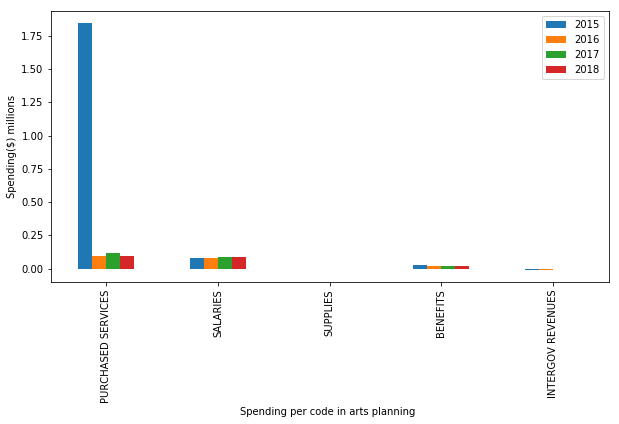

In [16]:
#character code for madison arts program 
agencydic= {"2015": {}, "2016": {} , "2017": {} , "2018": {} }
for year in agencydic:
    for code in art["Character Code"]:
        if code not in agencydic[year]:
            a = art[art["Character Code"]==code]
            summ = a[year].sum()
            agencydic[year][code] = copy.deepcopy(summ)
adf = pd.DataFrame(agencydic["2015"], index=["2015"])
bdf = pd.DataFrame(agencydic["2016"], index=["2016"])
cdf = pd.DataFrame(agencydic["2017"], index=["2017"])
ddf = pd.DataFrame(agencydic["2018"], index=["2018"])
artsum = pd.concat([adf, bdf, cdf, ddf])
artsum=artsum/1000000
plot5 = artsum.T.plot.bar(figsize=(10,5))
plot5.set_ylabel("Spending($) millions")
plot5.set_xlabel("Spending per code in arts planning ")
print(plot5)
artsum

In [17]:
#yearly spending graph of the top five spenditure organization in planning
art=agency[agency["Organization"] =="PL MADISON ARTS PROGRAM"]
b=agency[agency["Organization"] =="PL COMP PLAN AND DEVELOP ADMIN"]
c=agency[agency["Organization"] =="PL COMP NEIGH SPEC AREA PLAN"]
d=agency[agency["Organization"] =="PL NEIGH PLAN PRES DESIGN ADMI"]
e=agency[agency["Organization"] =="PL NEIGHBORHOOD PLANNING"]
df = pd.concat([art,b,c,d,e])



In [18]:
#character code for programs
agencydic= {"2015": {}, "2016": {} , "2017": {} , "2018": {} }
for year in agencydic:
    for code in b["Character Code"]:
        if code not in agencydic[year]:
            a = b[b["Character Code"]==code]
            summ = a[year].sum()
            agencydic[year][code] = copy.deepcopy(summ)
adf = pd.DataFrame(agencydic["2015"], index=["2015"])
bdf = pd.DataFrame(agencydic["2016"], index=["2016"])
cdf = pd.DataFrame(agencydic["2017"], index=["2017"])
ddf = pd.DataFrame(agencydic["2018"], index=["2018"])
bsum = pd.concat([adf, bdf, cdf, ddf])
bsum=bsum/1000000

agencydic= {"2015": {}, "2016": {} , "2017": {} , "2018": {} }
for year in agencydic:
    for code in c["Character Code"]:
        if code not in agencydic[year]:
            a = c[c["Character Code"]==code]
            summ = a[year].sum()
            agencydic[year][code] = copy.deepcopy(summ)
adf = pd.DataFrame(agencydic["2015"], index=["2015"])
bdf = pd.DataFrame(agencydic["2016"], index=["2016"])
cdf = pd.DataFrame(agencydic["2017"], index=["2017"])
ddf = pd.DataFrame(agencydic["2018"], index=["2018"])
csum = pd.concat([adf, bdf, cdf, ddf])
csum=csum/1000000

agencydic= {"2015": {}, "2016": {} , "2017": {} , "2018": {} }
for year in agencydic:
    for code in d["Character Code"]:
        if code not in agencydic[year]:
            a = d[d["Character Code"]==code]
            summ = a[year].sum()
            agencydic[year][code] = copy.deepcopy(summ)
adf = pd.DataFrame(agencydic["2015"], index=["2015"])
bdf = pd.DataFrame(agencydic["2016"], index=["2016"])
cdf = pd.DataFrame(agencydic["2017"], index=["2017"])
ddf = pd.DataFrame(agencydic["2018"], index=["2018"])
dsum = pd.concat([adf, bdf, cdf, ddf])
dsum=dsum/1000000


agencydic= {"2015": {}, "2016": {} , "2017": {} , "2018": {} }
for year in agencydic:
    for code in e["Character Code"]:
        if code not in agencydic[year]:
            a = e[e["Character Code"]==code]
            summ = a[year].sum()
            agencydic[year][code] = copy.deepcopy(summ)
adf = pd.DataFrame(agencydic["2015"], index=["2015"])
bdf = pd.DataFrame(agencydic["2016"], index=["2016"])
cdf = pd.DataFrame(agencydic["2017"], index=["2017"])
ddf = pd.DataFrame(agencydic["2018"], index=["2018"])
esum = pd.concat([adf, bdf, cdf, ddf])
esum=esum/1000000

In [19]:
agencydic= {"2015": {}, "2016": {} , "2017": {} , "2018": {} }
for year in agencydic:
    for code in df["Organization"]:
        if code not in agencydic[year]:
            a = df[df["Organization"]==code]
            summ = a[year].sum()
            agencydic[year][code] = copy.deepcopy(summ)
adf = pd.DataFrame(agencydic["2015"], index=["2015"])
bdf = pd.DataFrame(agencydic["2016"], index=["2016"])
cdf = pd.DataFrame(agencydic["2017"], index=["2017"])
ddf = pd.DataFrame(agencydic["2018"], index=["2018"])
new = pd.concat([adf, bdf, cdf, ddf])
new=new/1000000

artdf=pd.DataFrame(new["PL MADISON ARTS PROGRAM"])
pd.concat([artdf, artsum], axis=1, join_axes=[artdf.index])

,PL MADISON ARTS PROGRAM,PURCHASED SERVICES,SALARIES,SUPPLIES,BENEFITS,INTERGOV REVENUES
2015,1.942465,1.846316,0.077170,0.000109,0.029380,-0.01051
2016,0.182965,0.092629,0.081248,0.001114,0.018485,-0.01051
2017,0.218855,0.115405,0.083985,0.000397,0.019069,0.00000
2018,0.202924,0.096329,0.085897,0.000013,0.020685,0.00000


In [20]:
artsum=artsum.set_index([pd.Index(["2015", "2016", "2017", "PL MADISON ARTS PROGRAM 2018"])]) 
bsum=bsum.set_index(pd.Index(["2015", "2016", "2017", "PL COMP PLAN AND DEVELOP ADMIN 2018"]))
csum=csum.set_index(pd.Index(["2015", "2016", "2017", "PL COMP NEIGH SPEC AREA PLAN 2018"]))
dsum=dsum.set_index(pd.Index(["2015", "2016", "2017", "PL NEIGH PLAN PRES DESIGN ADM 2018"]))
esum=esum.set_index(pd.Index(["2015", "2016", "2017", "PL NEIGHBORHOOD PLANNING 2018"]))
stackdata=pd.concat([artsum, bsum, csum, dsum, esum])
ps = stackdata['PURCHASED SERVICES']
stackdata.drop(labels=['PURCHASED SERVICES'], axis=1,inplace = True)
stackdata.insert(9, 'PURCHASED SERVICES', ps)
stackdata

C:\cs301\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,BENEFITS,CHARGES FOR SERVICES,INTER DEPART BILLING,INTER DEPART CHARGES,INTERGOV REVENUES,INVEST OTHER CONTRIB,OTHER FINANCE SOURCE,SALARIES,SUPPLIES,PURCHASED SERVICES
2015,0.029380,NaN,NaN,NaN,-0.010510,NaN,NaN,0.077170,0.000109,1.846316
2016,0.018485,NaN,NaN,NaN,-0.010510,NaN,NaN,0.081248,0.001114,0.092629
2017,0.019069,NaN,NaN,NaN,0.000000,NaN,NaN,0.083985,0.000397,0.115405
PL MADISON ARTS PROGRAM 2018,0.020685,NaN,NaN,NaN,0.000000,NaN,NaN,0.085897,0.000013,0.096329
2015,0.056321,NaN,NaN,0.042846,0.000000,NaN,NaN,0.203733,0.019640,0.017590
2016,0.059801,NaN,NaN,0.042879,-0.007500,NaN,NaN,0.272602,0.030147,0.020910
2017,0.124605,NaN,NaN,0.042501,-0.006653,NaN,NaN,0.328777,0.044529,0.069487
PL COMP PLAN AND DEVELOP ADMIN 2018,0.095561,NaN,NaN,0.043525,0.000000,NaN,NaN,0.332655,0.023837,0.072469
2015,0.046250,NaN,NaN,NaN,NaN,NaN,NaN,0.151489,0.000000,0.021506
2016,0.059777,NaN,NaN,NaN,NaN,NaN,NaN,0.222172,0.000000,0.083776


Text(0.59, 0.8, '1.846316')

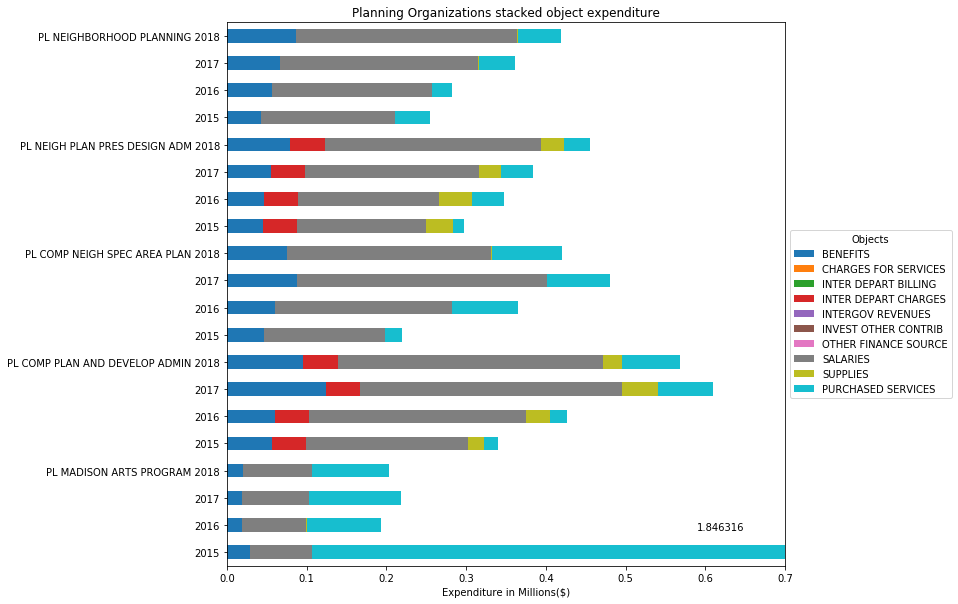

In [21]:
fig, ax = subplots()
stackplot=stackdata.transpose().T.plot.barh(figsize=(10,10),xlim=(0,0.7), stacked= True, title="Planning Organizations stacked object expenditure", ax=ax)
stackplot.set_xlabel("Expenditure in Millions($)")
stackplot.legend(title='Objects', bbox_to_anchor=(1, 0.3))
ax.annotate('1.846316',(0.59, 0.8))


In [22]:
artobj = art[art["Character Code"]=="PURCHASED SERVICES"]


Text(0.5, 0, 'Spending per object in arts planning ')

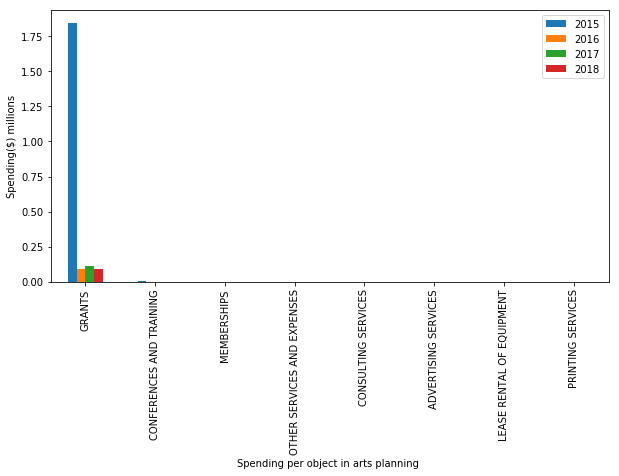

In [23]:
agencydic= {"2015": {}, "2016": {} , "2017": {} , "2018": {} }
for year in agencydic:
    for code in artobj["Object"]:
        if code not in agencydic[year]:
            a = artobj[artobj["Object"]==code]
            summ = a[year].sum()
            agencydic[year][code] = copy.deepcopy(summ)
adf = pd.DataFrame(agencydic["2015"], index=["2015"])
bdf = pd.DataFrame(agencydic["2016"], index=["2016"])
cdf = pd.DataFrame(agencydic["2017"], index=["2017"])
ddf = pd.DataFrame(agencydic["2018"], index=["2018"])
artobjsum = pd.concat([adf, bdf, cdf, ddf])
artobjsum=artobjsum/1000000
#artobjsum.sort_values(by="2015", ascending=False)
plot6=artobjsum.transpose().sort_values(by="2015", ascending=False).transpose().T.plot.bar(figsize=(10,5))
plot6.set_ylabel("Spending($) millions")
plot6.set_xlabel("Spending per object in arts planning ")

In [24]:
#webscraping 
#https://www.wisconsinhistory.org/Records?&facets=County%3a%22Dane%22%2cCommunity%3a%22Madison%22&nodes=Preserve--Sites&more=County
#REFERENCE https://realpython.com/python-web-scraping-practical-introduction/#setting-up-your-python-web-scraper


In [25]:
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup

In [26]:
def simple_get(url):
    """
    Attempts to get the content at `url` by making an HTTP GET request.
    If the content-type of response is some kind of HTML/XML, return the
    text content, otherwise return None.
    """
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content
            else:
                return None

    except RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None


def is_good_response(resp):
    """
    Returns True if the response seems to be HTML, False otherwise.
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('html') > -1)


def log_error(e):
    """
    It is always a good idea to log errors. 
    This function just prints them, but you can
    make it do anything.
    """
    print(e)

In [27]:
raw_html = simple_get('https://realpython.com/blog/')
len(raw_html)

396967

In [28]:
no_html = simple_get('https://realpython.com/blog/nope-not-gonna-find-it')
no_html is None


True

In [29]:
raw_html = simple_get('https://www.wisconsinhistory.org/Records?&facets=County%3a%22Dane%22%2cCommunity%3a%22Madison%22&nodes=Preserve--Sites&more=County')
html = BeautifulSoup(raw_html, 'html.parser')
for i, li in enumerate(html.select('li')):
    print(i, li.text)

0 Support Us
1 Membership
2 Donate
3 

                Home
            

4 

                Collections 




                        Explore Our Collections
                    



                        Henry and Elizabeth Baird Collection
                    



                        Maps and Atlases
                    



                        McCormick - International Harvester Collection
                    



                        Senator William Proxmire Collection
                    



                        Visual Materials
                    



                        Wisconsin in the Civil War
                    



                        Wisconsin Magazine of History Archives
                    



5 

                        Explore Our Collections
                    

6 

                        Henry and Elizabeth Baird Collection
                    

7 

                        Maps and Atlases
                    

8 

                        McCor

In [30]:
from requests import get
url = 'http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1'
response = get(url)
print(response.text[:500])



<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle",


In [31]:
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [32]:
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


In [33]:
movie_containers

[<div class="lister-item mode-advanced">
 <div class="lister-top-right">
 <div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
 </div>
 <div class="lister-item-image float-left">
 <a href="/title/tt3315342/?ref_=adv_li_i"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB470041630_.png" width="67"/>
 </a> </div>
 <div class="lister-item-content">
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt3315342/?ref_=adv_li_tt">Logan</a>
 <span class="lister-item-year text-muted unbold">(2017)</span>
 </h3>
 <p class="text-muted ">
 <span class="certificate">R</span>
 <span class="ghost">|</span>
 <span class="runtime">137 min</span>
 <span

In [ ]:
import requests
from bs4 import BeautifulSoup
from requests import get
url = 'https://www.wisconsinhistory.org/Records?&facets=County%3a%22Dane%22%2cCommunity%3a%22Madison%22&nodes=Preserve--Sites&more=County'
response = get(url)
html_soup = BeautifulSoup(response.text, 'html.parser')
container = html_soup.find_all('div', class_ = 'search-record')
container_names = container.find_all('a')

In [ ]:
import requests
from bs4 import BeautifulSoup


# Collect and parse first page
page = requests.get('https://web.archive.org/web/20121007172955/https://www.nga.gov/collection/anZ1.htm')
soup = BeautifulSoup(page.text, 'html.parser')

# Pull all text from the BodyText div
artist_name_list = soup.find(class_='BodyText')


# Pull text from all instances of <a> tag within BodyText div
artist_name_list_items = artist_name_list.find_all('a')


In [38]:
import requests
from bs4 import BeautifulSoup


# Collect and parse first page
url = 'https://www.wisconsinhistory.org/Records?&facets=County%3a%22Dane%22%2cCommunity%3a%22Madison%22&nodes=Preserve--Sites&more=County'

page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

# Pull all text from the BodyText div
lists = soup.find(class_='results-list')

lists


<section class="results-list">
<h1 style="display:inline-block;">
        Results 1-20 of 7921
    </h1>
<form action="/Records/" id="sortForm" style="display:inline-block; padding: 0 0 3px 12px;">
<input name="facets" type="hidden" value='County:"Dane",Community:"Madison"'/> <input name="nodes" type="hidden" value="Preserve--Sites"/> <input name="more" type="hidden" value="County"/> <label>Sort by:
            <select name="sort" style="border: 1px #ccc inset;">
<option value="0">Relevance</option>
<option value="1">Title, A-Z</option>
<option value="2">Title, Z-A</option>
<option value="3">Type, A-Z</option>
<option value="4">Type, Z-A</option>
<option value="5">Oldest Date</option>
<option value="6">Newest Date</option>
<option value="7">Oldest Online</option>
<option value="8">Newest Online</option>
</select>
</label>
</form>
<ul>
<li class="current-page">
1            </li>
<li class="other-page">
<a href="?&amp;facets=County%3a%22Dane%22%2cCommunity%3a%22Madison%22&amp;nodes=Pres

In [39]:
# Pull text from all instances of <a> tag within BodyText div
list_items = lists.find_all('a', attrs={'href': re.compile("^/Records/NationalRegister/NR")})
list_items

[<a href="/Records/NationalRegister/NR100">
 <img src="//www.wisconsinhistory.org/images/site/property-certification.png"/>
 </a>, <a href="/Records/NationalRegister/NR100">
                 121 Langdon St.
             </a>, <a href="/Records/NationalRegister/NR1013">
 <img src="//www.wisconsinhistory.org/images/site/property-certification.png"/>
 </a>, <a href="/Records/NationalRegister/NR1013">
                 416 E. Wilson St.
             </a>, <a href="/Records/NationalRegister/NR1043">
 <img src="//www.wisconsinhistory.org/images/site/property-certification.png"/>
 </a>, <a href="/Records/NationalRegister/NR1043">
                 102--118 King and 115--123 E. Main Sts.
             </a>, <a href="/Records/NationalRegister/NR1054">
 <img src="//www.wisconsinhistory.org/images/site/property-certification.png"/>
 </a>, <a href="/Records/NationalRegister/NR1054">
                 117--119 E. Mifflin St.
             </a>, <a href="/Records/NationalRegister/NR1061">
 <img src="//ww

In [40]:
for name in list_items:
    print(name.prettify())

<a href="/Records/NationalRegister/NR100">
 <img src="//www.wisconsinhistory.org/images/site/property-certification.png"/>
</a>

<a href="/Records/NationalRegister/NR100">
 121 Langdon St.
</a>

<a href="/Records/NationalRegister/NR1013">
 <img src="//www.wisconsinhistory.org/images/site/property-certification.png"/>
</a>

<a href="/Records/NationalRegister/NR1013">
 416 E. Wilson St.
</a>

<a href="/Records/NationalRegister/NR1043">
 <img src="//www.wisconsinhistory.org/images/site/property-certification.png"/>
</a>

<a href="/Records/NationalRegister/NR1043">
 102--118 King and 115--123 E. Main Sts.
</a>

<a href="/Records/NationalRegister/NR1054">
 <img src="//www.wisconsinhistory.org/images/site/property-certification.png"/>
</a>

<a href="/Records/NationalRegister/NR1054">
 117--119 E. Mifflin St.
</a>

<a href="/Records/NationalRegister/NR1061">
 <img src="//www.wisconsinhistory.org/images/site/property-certification.png"/>
</a>

<a href="/Records/NationalRegister/NR1061">
 Vilas

In [41]:
for name in list_items:
    names = name.contents[0]
    print(names)




                121 Langdon St.
            



                416 E. Wilson St.
            



                102--118 King and 115--123 E. Main Sts.
            



                117--119 E. Mifflin St.
            



                Vilas Circle
            



                Sherman Ave. roughly between Marston Ave. and N. Brearly St.
            



                1010 Sherman Ave.
            



                121-129 S. Hamilton St.
            



                816 Troy Dr.
            



                Roughly bounded by Spaight St., S. Few St., Lake Monona, and S. Ingersoll St.
            



                University of Wisconsin Arboretum
            



                Roughly bounded by S. Webster, King, E. Wilson, E. Doty, S. Pinkney, and E. Main Sts.
            



                Elmside Park
            



                Vilas Park
            



                Address Restricted
            



                Edgewood College
            





In [42]:
for name in list_items:
    names = name.contents[0]
    links = 'https://www.wisconsinhistory.org' + name.get('href')
    print(names)
    print(links)



https://www.wisconsinhistory.org/Records/NationalRegister/NR100

                121 Langdon St.
            
https://www.wisconsinhistory.org/Records/NationalRegister/NR100


https://www.wisconsinhistory.org/Records/NationalRegister/NR1013

                416 E. Wilson St.
            
https://www.wisconsinhistory.org/Records/NationalRegister/NR1013


https://www.wisconsinhistory.org/Records/NationalRegister/NR1043

                102--118 King and 115--123 E. Main Sts.
            
https://www.wisconsinhistory.org/Records/NationalRegister/NR1043


https://www.wisconsinhistory.org/Records/NationalRegister/NR1054

                117--119 E. Mifflin St.
            
https://www.wisconsinhistory.org/Records/NationalRegister/NR1054


https://www.wisconsinhistory.org/Records/NationalRegister/NR1061

                Vilas Circle
            
https://www.wisconsinhistory.org/Records/NationalRegister/NR1061


https://www.wisconsinhistory.org/Records/NationalRegister/NR1068

             

In [2]:
#ref https://www.digitalocean.com/community/tutorials/how-to-scrape-web-pages-with-beautiful-soup-and-python-3
import requests
import csv
from bs4 import BeautifulSoup
pages = []
for i in range(0, 7920, 20):
    url = 'https://www.wisconsinhistory.org/Records?&facets=County%3a%22Dane%22%2cCommunity%3a%22Madison%22&nodes=Preserve--Sites&more=County' + "&start=" + str(i) 
    pages.append(url)
pages


['https://www.wisconsinhistory.org/Records?&facets=County%3a%22Dane%22%2cCommunity%3a%22Madison%22&nodes=Preserve--Sites&more=County&start=0',
 'https://www.wisconsinhistory.org/Records?&facets=County%3a%22Dane%22%2cCommunity%3a%22Madison%22&nodes=Preserve--Sites&more=County&start=20',
 'https://www.wisconsinhistory.org/Records?&facets=County%3a%22Dane%22%2cCommunity%3a%22Madison%22&nodes=Preserve--Sites&more=County&start=40',
 'https://www.wisconsinhistory.org/Records?&facets=County%3a%22Dane%22%2cCommunity%3a%22Madison%22&nodes=Preserve--Sites&more=County&start=60',
 'https://www.wisconsinhistory.org/Records?&facets=County%3a%22Dane%22%2cCommunity%3a%22Madison%22&nodes=Preserve--Sites&more=County&start=80',
 'https://www.wisconsinhistory.org/Records?&facets=County%3a%22Dane%22%2cCommunity%3a%22Madison%22&nodes=Preserve--Sites&more=County&start=100',
 'https://www.wisconsinhistory.org/Records?&facets=County%3a%22Dane%22%2cCommunity%3a%22Madison%22&nodes=Preserve--Sites&more=County&sta

In [46]:
f = csv.writer(open('historic.csv', 'w'))
f.writerow(['Name', 'Link'])

for item in pages:
    page = requests.get(item)
    soup = BeautifulSoup(page.text, 'html.parser')

    name_list = soup.find(class_='results-list')
    name_list_items = name_list.find_all('a', attrs={'href': re.compile("^/Records/NationalRegister/NR")})

    for name in name_list_items:
        names = name.contents[0]
        links = 'https://www.wisconsinhistory.org' + name.get('href')
        f.writerow([names, links])

In [3]:
historichome = pd.read_csv("historic.csv")
historichome=pd.DataFrame(historichome)
#Cleaning up the data

historichome["Name"]= historichome["Name"].str.replace('[^0-9A-Za-z\s]+', '').str.strip()
historichome = historichome[historichome.Name != ""]
historichome

,Name,Link
1,121 Langdon St,https://www.wisconsinhistory.org/Records/Natio...
3,416 E Wilson St,https://www.wisconsinhistory.org/Records/Natio...
5,102118 King and 115123 E Main Sts,https://www.wisconsinhistory.org/Records/Natio...
7,117119 E Mifflin St,https://www.wisconsinhistory.org/Records/Natio...
9,Vilas Circle,https://www.wisconsinhistory.org/Records/Natio...
11,Sherman Ave roughly between Marston Ave and N ...,https://www.wisconsinhistory.org/Records/Natio...
13,1010 Sherman Ave,https://www.wisconsinhistory.org/Records/Natio...
15,121129 S Hamilton St,https://www.wisconsinhistory.org/Records/Natio...
17,816 Troy Dr,https://www.wisconsinhistory.org/Records/Natio...
19,Roughly bounded by Spaight St S Few St Lake Mo...,https://www.wisconsinhistory.org/Records/Natio...


In [143]:
#making table columm
page = requests.get("https://www.wisconsinhistory.org/Records/NationalRegister/NR100")

soup = BeautifulSoup(page.text, 'html.parser')
prop = soup.find(class_="RecordContainer whpd-record")
prophead = prop.find_all('th')
prophead=str(prophead).replace(":", "")
prophead=prophead.split(",")
prophead=pd.DataFrame(prophead)
prophead=prophead[0].str.replace('[^0-9A-Za-z\s]+', '').str.strip()
prophead=pd.DataFrame(prophead.str.replace("th",""))
tc=prophead.rename(columns={0: 'Description'})
tc

,Description
0,Historic Name
1,Reference Number
2,Location Address
3,County
4,CityVillage
5,Township
6,Period of Significance
7,Area of Significance
8,Area of Significance
9,Applicable Criteria


In [80]:
#making row
tablelist = []
for link in historichome["Link"]:
    page = requests.get(link)
    soup = BeautifulSoup(page.text, 'html.parser')
    prop = soup.find(class_="RecordContainer whpd-record")
    propdesc = prop.find_all('td')
    propdesc = pd.DataFrame(propdesc)
    #propdesc=propdesc.drop(propdesc.index[[6,26]])
    tablelist.append(propdesc)
tablelist.head()


[                                                    0
 0                       <td>Suhr, John J., House</td>
 1                                   <td>82000660</td>
 2                            <td>121 Langdon St.</td>
 3                                       <td>Dane</td>
 4                                    <td>Madison</td>
 5                                           <td></td>
 6                                           <td></td>
 7                         <td>1900-19241875-1899</td>
 8                               <td>Architecture</td>
 9                   <td>Ethnic Heritage/European</td>
 10                                    <td>Person</td>
 11                  <td>Architecture/Engineering</td>
 12                 <td>Domestic: Single Dwelling</td>
 13                             <td>Second Empire</td>
 14                                  <td>Building</td>
 15           <td>Listed in the National Register</td>
 16              <td>Listed in the State Register</td>
 17       

In [145]:
table=pd.concat(tablelist, axis = 1, sort=False)

table=pd.concat([tc,table], axis = 1, sort=False)
table.set_index('Description', inplace=True)
table=table.transpose()
table

        

Description,Historic Name,Reference Number,Location Address,County,CityVillage,Township,Period of Significance,Area of Significance,Area of Significance,Applicable Criteria,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
0,"<td>Suhr, John J., House</td>",<td>82000660</td>,<td>121 Langdon St.</td>,<td>Dane</td>,<td>Madison</td>,<td></td>,<td></td>,<td>1900-19241875-1899</td>,<td>Architecture</td>,<td>Ethnic Heritage/European</td>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,<td>Cardinal Hotel</td>,<td>82000650</td>,<td>416 E. Wilson St.</td>,<td>Dane</td>,<td>Madison</td>,<td></td>,<td></td>,<td>1900-19241925-1949</td>,<td>Architecture</td>,<td>Commerce</td>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,<td>Simeon Mills Historic District</td>,<td>87001063</td>,<td>102--118 King and 115--123 E. Main Sts.</td>,<td>Dane</td>,<td>Madison</td>,<td></td>,<td></td>,<td>1845-1936</td>,<td>Architecture</td>,<td>Commerce</td>,...,"<td><a href=""/Records/Article/CS2836"">National...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,<td>Wakeley--Giles Commercial Building</td>,<td>88000081</td>,<td>117--119 E. Mifflin St.</td>,<td>Dane</td>,<td>Madison</td>,<td></td>,<td></td>,<td>1900-1924</td>,<td>Ethnic Heritage/European</td>,<td>Event</td>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,<td>Vilas Circle Bear Effigy Mound and the Cur...,<td>74000078</td>,<td>Vilas Circle</td>,<td>Dane</td>,<td>Madison</td>,<td></td>,<td></td>,<td>1000-500 AD</td>,<td>Archeology/Prehistoric</td>,<td>Ethnic Heritage/Native American</td>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,<td>Sherman Avenue Historic District</td>,<td>88000216</td>,<td>Sherman Ave. roughly between Marston Ave. ...,<td>Dane</td>,<td>Madison</td>,<td></td>,<td></td>,<td>1854-1939</td>,<td>Architecture</td>,<td>Architecture/Engineering</td>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"<td>Hirsig, Louis, House</td>",<td>74000072</td>,<td>1010 Sherman Ave.</td>,<td>Dane</td>,<td>Madison</td>,<td></td>,<td></td>,<td>1900-1924</td>,<td>Architecture</td>,<td>Architecture/Engineering</td>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,<td>Baskerville Apartment Building</td>,<td>88002006</td>,<td>121-129 S. Hamilton St.</td>,<td>Dane</td>,<td>Madison</td>,<td></td>,<td></td>,<td>1900-1924</td>,<td>Architecture</td>,<td>Architecture/Engineering</td>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,<td>Wisconsin Memorial Hospital Historic Distr...,<td>88002183</td>,<td>816 Troy Dr.</td>,<td>Dane</td>,<td>Madison</td>,<td></td>,<td></td>,<td>1922-1933</td>,<td>Health/Medicine</td>,<td>Event</td>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,<td>Orton Park Historic District</td>,<td>88000221</td>,"<td>Roughly bounded by Spaight St., S. Few St....",<td>Dane</td>,<td>Madison</td>,<td></td>,<td></td>,<td>1855-1936</td>,<td>Architecture</td>,<td>Commerce</td>,...,<td>0</td>,"<td><a href=""/Records/Article/CS2836"">National...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
